# A-Star Puzzle

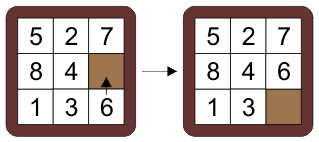

In [11]:
import heapq as hq
import time
#import resource
import sys
import numpy as np
import pandas as pd
import math
import copy
config = 6,5,8,4,1,7,3,2,0
goal_state = 1,2,3,4,5,6,7,8,0
n = 3

In [2]:
def display(config,n):
        for i in range(n):
            line = []
            offset = i * n
            for j in range(n):
                line.append(config[offset + j])
            print (line)
    

In [3]:
def move_left(config,blank_row,blank_col,path):
        if blank_col == 0:
            return None
        else:
            blank_index = blank_row * n + blank_col
            target = blank_index - 1
            new_config = list(config)
            new_config[blank_index], new_config[target] = new_config[target], new_config[blank_index]
            #return PuzzleState(tuple(new_config), n, parent=self,action="Left", cost=cost + 1)
            #cost = cost+1
            path.append("Left")
            return(tuple(new_config),n,path)

In [4]:
def move_right(config,blank_row,blank_col,path):
        if blank_col == n - 1:
            return None
        else:
            blank_index = blank_row * n + blank_col
            target = blank_index + 1
            new_config = list(config)
            new_config[blank_index], new_config[target] = new_config[target], new_config[blank_index]
            #return PuzzleState(tuple(new_config), n, parent=self,action="Right", cost=cost + 1)
            #cost = cost+1
            path.append("Right")
            return(tuple(new_config),n,path)

In [5]:
def move_up(config,blank_row,blank_col,path):
        if blank_row == 0:
            return None
        else:
            blank_index = blank_row * n + blank_col
            target = blank_index - n
            new_config = list(config)
            new_config[blank_index], new_config[target] = new_config[target], new_config[blank_index]
            #return PuzzleState(tuple(new_config), self.n, parent=self,action="Up", cost=self.cost + 1)
            #cost = cost+1
            path.append("Up")
            return(tuple(new_config),n,path)

In [6]:
def move_down(config,blank_row,blank_col,path):
        if blank_row == n - 1:
            return None
        else:
            blank_index = blank_row * n + blank_col
            target = blank_index + n
            new_config = list(config)
            new_config[blank_index], new_config[target] = new_config[target], new_config[blank_index]
            #return PuzzleState(tuple(new_config), self.n, parent=self,action="Down", cost=self.cost + 1)
            #cost = cost+1
            path.append("Down")
            return(tuple(new_config),n,path)

In [7]:
def expand(config,children,path):
    """expand the node"""
    # add child nodes in order of UDLR
    for i, item in enumerate(config):
        if item == 0:
            blank_row = int(i / n)
            blank_col = i % n
    #print(config,"in expand")
    path_up = list(path)
    path_down = list(path)
    path_left = list(path)
    path_right = list(path)
   
    if len(children) == 0:
        up_child = move_up(config,blank_row,blank_col,path_up)
        if up_child is not None:
            children.append(up_child)
            #cost = cost+1
        down_child = move_down(config,blank_row,blank_col,path_down)
        if down_child is not None:
            children.append(down_child)
            #cost = cost+1
        left_child = move_left(config,blank_row,blank_col,path_left)
        if left_child is not None:
            children.append(left_child)
            #cost = cost+1
        right_child = move_right(config,blank_row,blank_col,path_right)
        if right_child is not None:
            children.append(right_child)
            #cost = cost+1
    return children


In [8]:
def manhattan_dist(config):
    sum = 0
    config_state_positions = []#list for config's i and j positions
    count = 0
    #populating the config's position list 
    for i in range(1,4):
        for j in range(1,4):
            config_state_positions.append([config[count],i,j])
            count = count+1
    #setting a distance of goal state measure     
    goal_state_positions = [[1,1,1],[2,1,2],[3,1,3],[4,2,1],[5,2,2],[6,2,3],[7,3,1],[8,3,2],[0,3,3]]
    distance = 0
    #finding the distance by iterating through both the lists and getting the i and j differences and adding them
    for count in range (len(config_state_positions)):
        for count2 in range (len(goal_state_positions)):
            if config_state_positions[count][0] == goal_state_positions[count2][0]:
                diff_i = abs(config_state_positions[count][1]- goal_state_positions[count2][1])
                diff_j = abs(config_state_positions[count][2]- goal_state_positions[count2][2])
                distance = distance + diff_i + diff_j
                #print(config_state_positions[count],goal_state_positions[count2])
    return distance
            

In [9]:
def ast(config,goal_state):
    cost = 0
    expanded_nodes = 0
    h_n = manhattan_dist(config)
    f_n = cost + h_n
    children_path_array = pd.DataFrame(columns = ['state','children','path'])#creating a data frame with columns that will be returned from expand
    start_time = time.time()
    path = []
    print("goal state")
    display(goal_state,3)
    frontier = []
    frontier_set = set()
    explored = set()
    hq.heappush(frontier,(f_n,config))
    frontier_set.add(config)
    while(not len(frontier)==0):
        state_popped = hq.heappop(frontier)
        state = state_popped[1]
        explored.add(state)
        print(state,"==>frontier")
        if(state == goal_state):
            slice1 = children_path_array.loc[children_path_array['state'] == state]
            states_slice = slice1.path
            data = (len(path)+1,states_slice.iloc[0],expanded_nodes) 
            format_string = "Success!!  cost is: %s , Path to the solution is:%s, Expanded nodes are:%s"
            print("--- %s seconds ---" % (time.time() - start_time))
            return (format_string % data)
            break
        else:
            children = []
            if(cost == 0):
                path = []
            else:
                slice1 = children_path_array.loc[children_path_array['state'] == state]
                states_slice = slice1.path
                path = states_slice.iloc[0]
            result = np.array(expand(state,children,path))  #expanding the current state
            result_df = pd.DataFrame(result, columns = ['state','children','path']) #converting np to df
            children_path_array = children_path_array.append(result_df,ignore_index= True)  # appending df to df
            expanded_nodes = expanded_nodes+1 #increasing cost (cost here is how many times has the program expanded)
            neighbors = result[:,0] #setting neighbors
            for neighbor in neighbors:
                #display(neighbor,3)
                if(neighbor not in frontier_set|explored ):
                    cost = len(path)+1
                    h_n = manhattan_dist(neighbor)
                    f_n = cost + h_n
                    hq.heappush(frontier,(f_n,neighbor))
                    frontier_set.add(neighbor)
    return "failure" 

        

In [12]:
ast(config,goal_state)

goal state
[1, 2, 3]
[4, 5, 6]
[7, 8, 0]
(6, 5, 8, 4, 1, 7, 3, 2, 0) ==>frontier
(6, 5, 8, 4, 1, 0, 3, 2, 7) ==>frontier
(6, 5, 0, 4, 1, 8, 3, 2, 7) ==>frontier
(6, 5, 8, 4, 1, 7, 3, 0, 2) ==>frontier
(6, 5, 8, 4, 0, 1, 3, 2, 7) ==>frontier
(6, 5, 8, 4, 2, 1, 3, 0, 7) ==>frontier
(6, 5, 8, 4, 2, 1, 3, 7, 0) ==>frontier
(6, 5, 8, 4, 1, 7, 0, 3, 2) ==>frontier
(6, 5, 8, 4, 2, 1, 0, 3, 7) ==>frontier
(6, 0, 5, 4, 1, 8, 3, 2, 7) ==>frontier
(6, 1, 5, 4, 0, 8, 3, 2, 7) ==>frontier
(6, 1, 5, 4, 2, 8, 3, 0, 7) ==>frontier
(6, 1, 5, 4, 2, 8, 3, 7, 0) ==>frontier
(6, 1, 5, 4, 2, 0, 3, 7, 8) ==>frontier
(6, 1, 5, 4, 8, 0, 3, 2, 7) ==>frontier
(6, 1, 0, 4, 2, 5, 3, 7, 8) ==>frontier
(6, 1, 0, 4, 8, 5, 3, 2, 7) ==>frontier
(6, 1, 5, 4, 2, 8, 0, 3, 7) ==>frontier
(6, 1, 5, 4, 8, 7, 3, 2, 0) ==>frontier
(6, 0, 8, 4, 5, 1, 3, 2, 7) ==>frontier
(6, 8, 0, 4, 5, 1, 3, 2, 7) ==>frontier
(6, 8, 1, 4, 5, 0, 3, 2, 7) ==>frontier
(6, 8, 1, 4, 5, 7, 3, 2, 0) ==>frontier
(6, 5, 8, 4, 2, 0, 3, 7, 1) ==>frontier

(1, 6, 8, 5, 7, 0, 4, 3, 2) ==>frontier
(1, 6, 8, 5, 7, 2, 4, 3, 0) ==>frontier
(1, 6, 0, 5, 7, 8, 4, 3, 2) ==>frontier
(4, 2, 6, 1, 7, 5, 0, 3, 8) ==>frontier
(4, 5, 8, 1, 0, 6, 3, 2, 7) ==>frontier
(4, 5, 8, 1, 2, 6, 3, 0, 7) ==>frontier
(4, 5, 8, 1, 2, 6, 3, 7, 0) ==>frontier
(4, 5, 8, 1, 2, 6, 0, 3, 7) ==>frontier
(4, 5, 8, 1, 6, 7, 3, 2, 0) ==>frontier
(4, 6, 0, 3, 1, 5, 2, 7, 8) ==>frontier
(4, 6, 5, 1, 0, 2, 3, 7, 8) ==>frontier
(4, 6, 8, 5, 0, 1, 3, 2, 7) ==>frontier
(4, 6, 8, 5, 1, 0, 3, 2, 7) ==>frontier
(4, 6, 8, 5, 2, 1, 3, 0, 7) ==>frontier
(4, 6, 8, 5, 2, 1, 3, 7, 0) ==>frontier
(4, 6, 0, 5, 1, 8, 3, 2, 7) ==>frontier
(4, 6, 8, 5, 1, 7, 3, 2, 0) ==>frontier
(4, 6, 8, 5, 2, 1, 0, 3, 7) ==>frontier
(4, 8, 6, 1, 0, 5, 3, 2, 7) ==>frontier
(4, 8, 6, 1, 2, 5, 3, 0, 7) ==>frontier
(4, 8, 6, 1, 2, 5, 3, 7, 0) ==>frontier
(4, 8, 6, 1, 5, 0, 3, 2, 7) ==>frontier
(4, 8, 0, 1, 5, 6, 3, 2, 7) ==>frontier
(4, 8, 6, 1, 2, 5, 0, 3, 7) ==>frontier
(4, 8, 6, 1, 5, 7, 3, 2, 0) ==>frontier


(4, 8, 6, 1, 2, 0, 3, 7, 5) ==>frontier
(5, 0, 8, 6, 1, 7, 4, 3, 2) ==>frontier
(5, 1, 8, 6, 0, 7, 4, 3, 2) ==>frontier
(5, 1, 8, 6, 3, 7, 4, 0, 2) ==>frontier
(5, 1, 8, 6, 3, 7, 4, 2, 0) ==>frontier
(5, 1, 8, 6, 3, 0, 4, 2, 7) ==>frontier
(5, 1, 8, 6, 7, 0, 4, 3, 2) ==>frontier
(5, 1, 8, 6, 7, 2, 4, 3, 0) ==>frontier
(5, 1, 8, 6, 7, 2, 4, 0, 3) ==>frontier
(5, 1, 0, 6, 3, 8, 4, 2, 7) ==>frontier
(5, 1, 0, 6, 7, 8, 4, 3, 2) ==>frontier
(5, 1, 8, 6, 0, 2, 4, 7, 3) ==>frontier
(5, 1, 8, 6, 2, 0, 4, 7, 3) ==>frontier
(5, 1, 8, 6, 2, 3, 4, 7, 0) ==>frontier
(5, 1, 0, 6, 2, 8, 4, 7, 3) ==>frontier
(5, 1, 8, 6, 0, 3, 4, 2, 7) ==>frontier
(5, 8, 0, 6, 1, 7, 4, 3, 2) ==>frontier
(5, 0, 8, 6, 2, 1, 4, 3, 7) ==>frontier
(5, 2, 8, 6, 0, 1, 4, 3, 7) ==>frontier
(5, 2, 8, 6, 1, 0, 4, 3, 7) ==>frontier
(5, 2, 8, 6, 3, 1, 4, 0, 7) ==>frontier
(5, 2, 8, 6, 3, 1, 4, 7, 0) ==>frontier
(5, 2, 0, 6, 1, 8, 4, 3, 7) ==>frontier
(5, 2, 8, 6, 1, 7, 4, 3, 0) ==>frontier
(5, 8, 0, 6, 2, 1, 4, 3, 7) ==>frontier


(1, 6, 5, 7, 3, 0, 4, 2, 8) ==>frontier
(1, 6, 5, 7, 8, 0, 4, 3, 2) ==>frontier
(1, 6, 5, 7, 8, 2, 4, 3, 0) ==>frontier
(1, 6, 5, 7, 8, 2, 4, 0, 3) ==>frontier
(1, 6, 0, 7, 3, 5, 4, 2, 8) ==>frontier
(1, 6, 0, 7, 8, 5, 4, 3, 2) ==>frontier
(1, 6, 5, 7, 0, 2, 4, 8, 3) ==>frontier
(1, 6, 5, 7, 2, 0, 4, 8, 3) ==>frontier
(1, 6, 5, 7, 2, 3, 4, 8, 0) ==>frontier
(1, 6, 0, 7, 2, 5, 4, 8, 3) ==>frontier
(1, 6, 5, 7, 0, 3, 4, 2, 8) ==>frontier
(1, 0, 5, 7, 6, 2, 4, 8, 3) ==>frontier
(1, 5, 0, 7, 6, 2, 4, 8, 3) ==>frontier
(1, 5, 2, 7, 6, 0, 4, 8, 3) ==>frontier
(1, 5, 2, 7, 6, 3, 4, 8, 0) ==>frontier
(1, 5, 2, 7, 0, 6, 4, 8, 3) ==>frontier
(1, 0, 2, 7, 5, 6, 4, 8, 3) ==>frontier
(1, 2, 0, 7, 5, 6, 4, 8, 3) ==>frontier
(1, 0, 5, 7, 6, 3, 4, 2, 8) ==>frontier
(1, 5, 0, 7, 6, 3, 4, 2, 8) ==>frontier
(1, 5, 3, 7, 6, 0, 4, 2, 8) ==>frontier
(1, 5, 3, 7, 0, 6, 4, 2, 8) ==>frontier
(1, 5, 3, 7, 2, 6, 4, 0, 8) ==>frontier
(1, 5, 3, 7, 2, 6, 4, 8, 0) ==>frontier
(1, 5, 3, 7, 6, 8, 4, 2, 0) ==>frontier


(4, 2, 6, 1, 5, 8, 0, 3, 7) ==>frontier
(4, 2, 6, 3, 0, 5, 7, 1, 8) ==>frontier
(4, 2, 6, 3, 5, 0, 7, 1, 8) ==>frontier
(4, 2, 0, 3, 5, 6, 7, 1, 8) ==>frontier
(4, 2, 6, 3, 5, 8, 7, 1, 0) ==>frontier
(4, 5, 0, 1, 2, 8, 3, 7, 6) ==>frontier
(4, 5, 2, 1, 0, 6, 3, 7, 8) ==>frontier
(4, 5, 6, 3, 0, 8, 1, 2, 7) ==>frontier
(4, 5, 6, 3, 2, 8, 1, 0, 7) ==>frontier
(4, 5, 6, 3, 2, 8, 1, 7, 0) ==>frontier
(4, 5, 6, 3, 2, 0, 1, 7, 8) ==>frontier
(4, 5, 6, 3, 8, 0, 1, 2, 7) ==>frontier
(4, 5, 0, 3, 2, 6, 1, 7, 8) ==>frontier
(4, 5, 0, 3, 8, 6, 1, 2, 7) ==>frontier
(4, 5, 6, 3, 8, 7, 1, 2, 0) ==>frontier
(4, 6, 0, 3, 5, 8, 2, 7, 1) ==>frontier
(4, 6, 0, 5, 2, 8, 3, 7, 1) ==>frontier
(4, 6, 1, 2, 0, 5, 3, 7, 8) ==>frontier
(4, 6, 1, 2, 5, 0, 3, 7, 8) ==>frontier
(4, 6, 1, 2, 5, 8, 3, 7, 0) ==>frontier
(4, 6, 1, 3, 0, 5, 2, 8, 7) ==>frontier
(4, 6, 1, 3, 5, 0, 2, 8, 7) ==>frontier
(4, 6, 1, 3, 0, 5, 7, 2, 8) ==>frontier
(4, 6, 1, 3, 5, 0, 7, 2, 8) ==>frontier
(4, 6, 1, 3, 5, 7, 2, 8, 0) ==>frontier


(1, 5, 3, 4, 2, 8, 7, 6, 0) ==>frontier
(1, 0, 5, 4, 2, 6, 3, 7, 8) ==>frontier
(1, 0, 5, 4, 2, 6, 7, 8, 3) ==>frontier
(1, 5, 0, 4, 2, 6, 7, 8, 3) ==>frontier
(1, 0, 5, 4, 6, 3, 2, 7, 8) ==>frontier
(1, 5, 0, 4, 6, 3, 2, 7, 8) ==>frontier
(1, 0, 5, 4, 6, 8, 3, 7, 2) ==>frontier
(1, 5, 0, 4, 6, 8, 3, 7, 2) ==>frontier
(1, 0, 5, 4, 6, 8, 7, 2, 3) ==>frontier
(1, 5, 0, 4, 6, 8, 7, 2, 3) ==>frontier
(1, 0, 5, 6, 2, 7, 4, 8, 3) ==>frontier
(1, 5, 0, 6, 2, 7, 4, 8, 3) ==>frontier
(1, 0, 6, 2, 4, 5, 3, 7, 8) ==>frontier
(1, 0, 6, 2, 8, 5, 4, 7, 3) ==>frontier
(1, 0, 6, 3, 2, 5, 4, 7, 8) ==>frontier
(1, 2, 6, 3, 0, 5, 4, 7, 8) ==>frontier
(1, 2, 6, 3, 5, 0, 4, 7, 8) ==>frontier
(1, 2, 0, 3, 5, 6, 4, 7, 8) ==>frontier
(1, 2, 6, 3, 5, 8, 4, 7, 0) ==>frontier
(1, 0, 6, 3, 4, 5, 2, 8, 7) ==>frontier
(1, 0, 6, 3, 4, 5, 7, 2, 8) ==>frontier
(1, 0, 6, 3, 8, 5, 4, 2, 7) ==>frontier
(1, 0, 6, 4, 2, 5, 7, 3, 8) ==>frontier
(1, 0, 6, 4, 5, 2, 7, 8, 3) ==>frontier
(1, 0, 6, 4, 5, 8, 2, 7, 3) ==>frontier


"Success!!  cost is: 26 , Path to the solution is:['Left', 'Left', 'Up', 'Right', 'Down', 'Right', 'Up', 'Left', 'Up', 'Left', 'Down', 'Right', 'Right', 'Up', 'Left', 'Down', 'Down', 'Right', 'Up', 'Up', 'Left', 'Down', 'Left', 'Down', 'Right', 'Right'], Expanded nodes are:1167"